<a href="https://colab.research.google.com/github/GuilhermeLopesBertacini/graphs-math-class/blob/main/graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Leitura do arquivo

In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from google.colab import files

# Faça o upload do arquivo corpus.txt
fazer_upload = files.upload()

# Leitura do arquivo
file_path = 'corpus.txt'
df = pd.read_csv(file_path, sep='\t', header=0)

df.head()


Saving corpus.txt to corpus.txt


,Rafael,Joao,Bia,Giovana,Caio,Henrique
0,@neymar,@neymar,@Beyonce,@ProfCaio,@profRafael,@ProfCaio
1,@LuanSantana,@LuanSantana,@DorivalJr,@ProfDouglas,@profHenrique,@profHenrique
2,@Pericles,@Pericles,@FDiniz,@profHenrique,@Unimar,@profRafael
3,@ProfCaio,@ProfCaio,@Cr7,@Unimar,@Unesp,@Unimar
4,@ProfDouglas,@ProfDouglas,@Messi,@Unesp,@Anitta,@Unesp


# 2. Conversão do conteúdo em uma estrutura adequada

In [ ]:
# Transformando em uma lista de listas
corpus = df.values.tolist()
print(corpus)

[['@neymar', '@neymar', '@Beyonce', '@ProfCaio', '@profRafael', '@ProfCaio'], ['@LuanSantana', '@LuanSantana', '@DorivalJr', '@ProfDouglas', '@profHenrique', '@profHenrique'], ['@Pericles', '@Pericles', '@FDiniz', '@profHenrique', '@Unimar', '@profRafael'], ['@ProfCaio', '@ProfCaio', '@Cr7', '@Unimar', '@Unesp', '@Unimar'], ['@ProfDouglas', '@ProfDouglas', '@Messi', '@Unesp', '@Anitta', '@Unesp'], ['@profHenrique', '@profHenrique', '@LebronJames', '@Anitta', '@Rihana', '@Anitta'], ['@Unimar', '@Unimar', '@PaulMcCartney', '@Rihana', '@Beyonce', '@Rihana'], ['@Unesp', '@Unesp', '@profRafael', '@Beyonce', '@Cr7', '@Beyonce'], ['@Anitta', '@Anitta', nan, '@Cr7', '@Messi', '@Cr7'], ['@Rihana', '@Rihana', nan, '@Messi', '@LebronJames', '@Messi'], ['@Beyonce', '@Beyonce', nan, '@LebronJames', nan, '@LebronJames'], ['@DorivalJr', '@DorivalJr', nan, '@PaulMcCartney', nan, nan], ['@FDiniz', '@FDiniz', nan, '@profRafael', nan, nan], ['@Cr7', '@profRafael', nan, nan, nan, nan], ['@Messi', nan, nan

# 3. Geração das matrizes de incidência, similaridade e coocorrência

Matriz de Incidência

In [ ]:
# Pegando os nomes das colunas
nomes_colunas = df.columns

# Convertendo para uma lista
pessoas = df.columns.tolist()
print(pessoas)

# Criando um dicionário para mapear usuários para índices
pessoa_indice = {usuario: i for i, usuario in enumerate(pessoas)}
print(pessoa_indice)

['Rafael', 'Joao', 'Bia', 'Giovana', 'Caio', 'Henrique']
{'Rafael': 0, 'Joao': 1, 'Bia': 2, 'Giovana': 3, 'Caio': 4, 'Henrique': 5}


In [ ]:
# Pegando as celebridades
celebridades = []
for sublist in corpus:
  for celebridade in sublist:
    if pd.notna(celebridade):
      celebridades.append(celebridade)
celebridades = sorted(set(celebridades))
print(celebridades)


['@Anitta', '@Beyonce', '@Cr7', '@DorivalJr', '@FDiniz', '@LebronJames', '@LuanSantana', '@Messi', '@PaulMcCartney', '@Pericles', '@ProfCaio', '@ProfDouglas', '@Rihana', '@Unesp', '@Unimar', '@neymar', '@profHenrique', '@profRafael']


In [ ]:
# Criando a matriz incidencia:
matriz_incidencia = np.zeros((len(pessoas), len(celebridades)),dtype=int)

# Atribuindo dados a matriz
for linha, pessoa in enumerate(pessoas):
  for coluna, celebridade in enumerate(celebridades):
    if celebridade in df[pessoa].values:
      matriz_incidencia[linha][coluna] = 1
    else:
      matriz_incidencia[linha][coluna] = 0

print(matriz_incidencia)

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1]
 [1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 0 1 1]
 [1 1 1 0 0 1 0 1 0 0 0 0 1 1 1 0 1 1]
 [1 1 1 0 0 1 0 1 0 0 1 0 1 1 1 0 1 1]]


Matriz de Similaridade

In [ ]:
# Matriz de similaridade (produto interno da matriz de incidência)
matriz_similaridade = np.dot(matriz_incidencia, matriz_incidencia.T)

# Atribuir 0 na diag principal
np.fill_diagonal(matriz_similaridade, 0)

# Exibindo a matriz de similaridade
print(matriz_similaridade)

[[ 0 13  7 12  9 10]
 [13  0  4  9  7  8]
 [ 7  4  0  6  5  5]
 [12  9  6  0 10 11]
 [ 9  7  5 10  0 10]
 [10  8  5 11 10  0]]


Matriz de Coocorrência

In [ ]:
# Mmatriz coocorrencia
matriz_coocorrencia = np.dot(matriz_incidencia.T, matriz_incidencia)

# Atribuindo 0 à diagonal principal
np.fill_diagonal(matriz_coocorrencia, 0)

# Exibindo a matriz de coocorrência
print(matriz_coocorrencia)

[[0 5 4 2 2 4 2 4 2 2 4 3 5 5 5 2 5 4]
 [5 0 5 3 3 5 2 5 3 2 4 3 5 5 5 2 5 5]
 [4 5 0 2 2 5 1 5 3 1 3 2 4 4 4 1 4 4]
 [2 3 2 0 3 2 2 2 2 2 2 2 2 2 2 2 2 2]
 [2 3 2 3 0 2 2 2 2 2 2 2 2 2 2 2 2 2]
 [4 5 5 2 2 0 1 5 3 1 3 2 4 4 4 1 4 4]
 [2 2 1 2 2 1 0 1 1 2 2 2 2 2 2 2 2 1]
 [4 5 5 2 2 5 1 0 3 1 3 2 4 4 4 1 4 4]
 [2 3 3 2 2 3 1 3 0 1 2 2 2 2 2 1 2 2]
 [2 2 1 2 2 1 2 1 1 0 2 2 2 2 2 2 2 1]
 [4 4 3 2 2 3 2 3 2 2 0 3 4 4 4 2 4 3]
 [3 3 2 2 2 2 2 2 2 2 3 0 3 3 3 2 3 2]
 [5 5 4 2 2 4 2 4 2 2 4 3 0 5 5 2 5 4]
 [5 5 4 2 2 4 2 4 2 2 4 3 5 0 5 2 5 4]
 [5 5 4 2 2 4 2 4 2 2 4 3 5 5 0 2 5 4]
 [2 2 1 2 2 1 2 1 1 2 2 2 2 2 2 0 2 1]
 [5 5 4 2 2 4 2 4 2 2 4 3 5 5 5 2 0 4]
 [4 5 4 2 2 4 1 4 2 1 3 2 4 4 4 1 4 0]]


# 4. Construção e visualização dos grafos

Grafo de Incidência

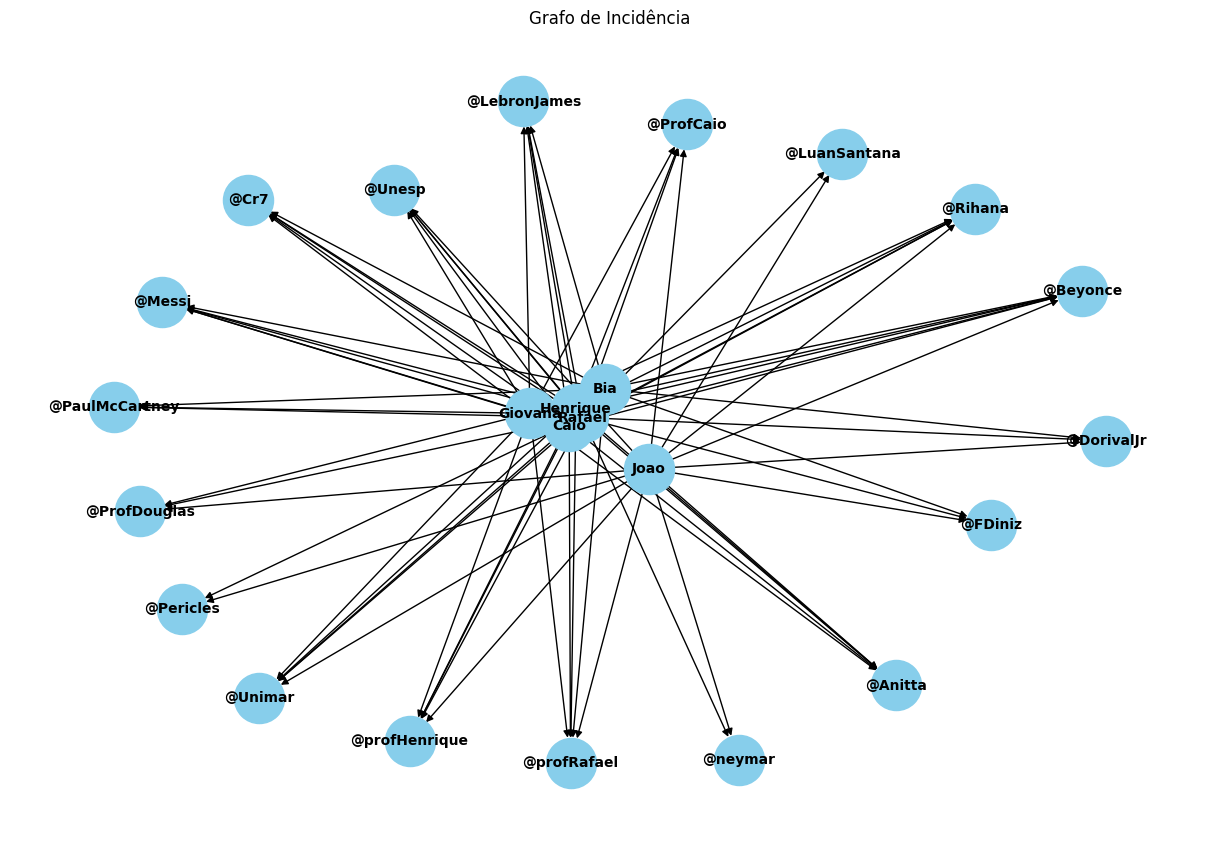

In [ ]:
# Construindo o grafo de incidência
G_incidencia = nx.DiGraph()

# Adicionando nós para usuários
for pessoa in pessoas:
  G_incidencia.add_node(pessoa, bipartite=0)

# Adicionando nós para celebridades
for celebridade in celebridades:
  G_incidencia.add_node(celebridade, bipartite=1) # 1 pois os nós de celebridades se conectaram ao nós dos usuários (0)

# Adicionando arestas entre pessoas e celebridades
for linha, pessoa in enumerate(pessoas):
  for coluna, celebridade in enumerate(celebridades):
    if celebridade in df[pessoa].values:
      G_incidencia.add_edge(pessoa, celebridade)

# G_incidencia.add_edge(usuario, pessoa)

# Desenhando o grafo de incidência
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G_incidencia)  # Layout do grafo
nx.draw(G_incidencia, pos, with_labels=True, node_size=1300, node_color='skyblue', font_size=10, font_weight='bold')
plt.title('Grafo de Incidência')
plt.show()

Grafo de Similaridade

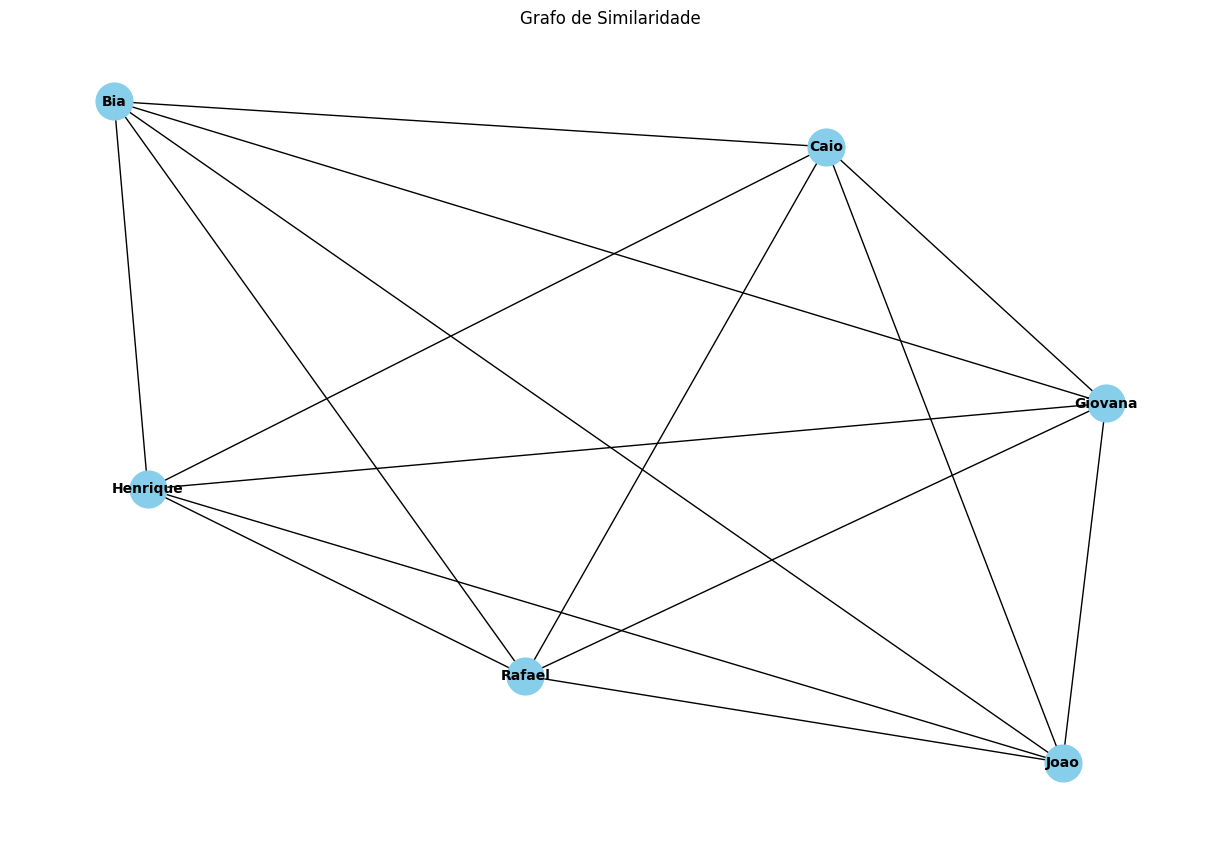

In [ ]:
# Construindo o grafo de similaridade
G_similaridade = nx.Graph()
for i in range(len(pessoas)):
    for j in range(i + 1, len(pessoas)):
        if matriz_similaridade[i, j] > 0:
            G_similaridade.add_edge(pessoas[i], pessoas[j], weight=(matriz_similaridade[i,j]))

# Desenhando o grafo de similaridade
plt.figure(figsize=(12, 8))
nx.draw(G_similaridade, with_labels=True, node_size=700, node_color='skyblue', font_size=10, font_weight='bold')
plt.title('Grafo de Similaridade')
plt.show()


Grafo de Coocorrência

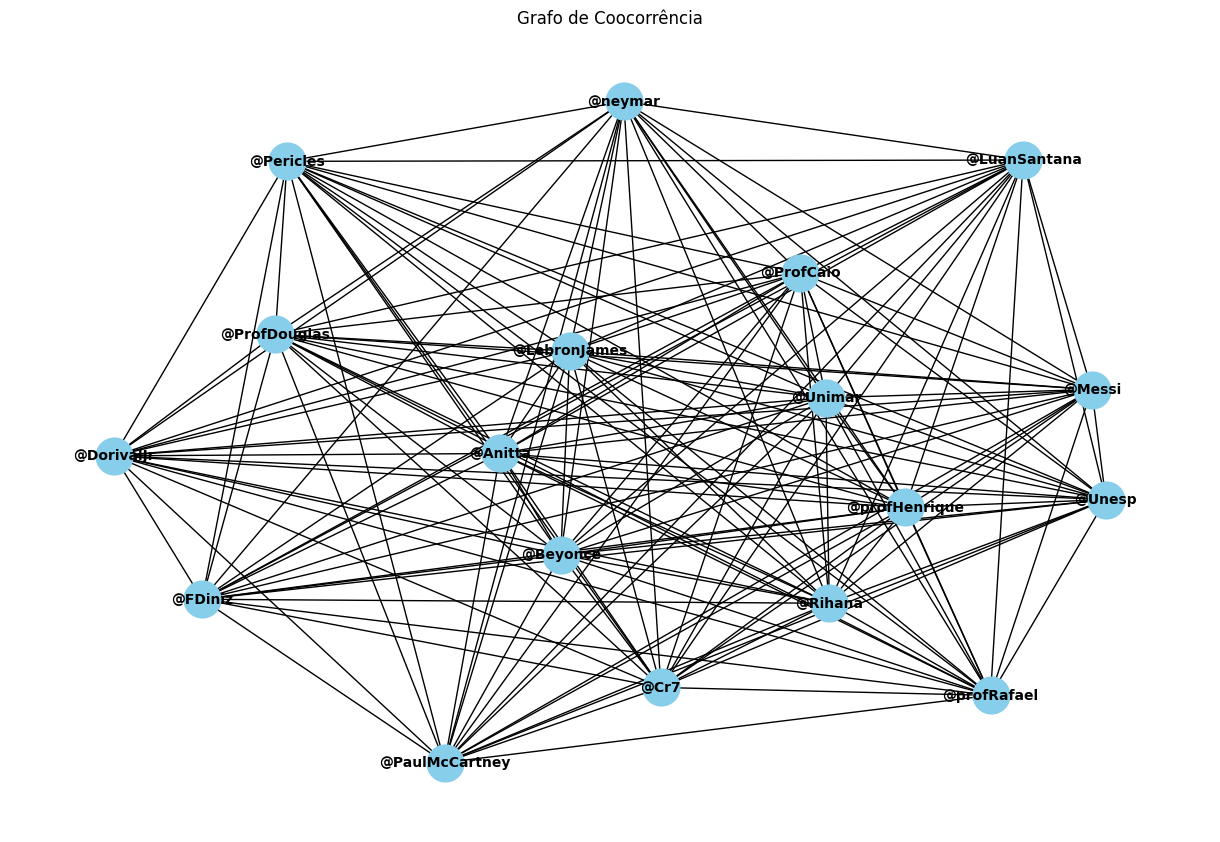

In [ ]:
# Construindo o grafo de coocorrência
G_coocorrencia = nx.Graph()
for i in range(len(celebridades)):
    for j in range(i + 1, len(celebridades)):
        if matriz_coocorrencia[i, j] > 0:
            G_coocorrencia.add_edge(celebridades[i], celebridades[j], weight=matriz_coocorrencia[i, j])

# Desenhando o grafo de coocorrência
plt.figure(figsize=(12, 8))
nx.draw(G_coocorrencia, with_labels=True, node_size=700, node_color='skyblue', font_size=10, font_weight='bold')
plt.title('Grafo de Coocorrência')
plt.show()
